<a href="https://colab.research.google.com/github/zia207/01_Generalized_Linear_Models_R/blob/main/Notebook/02_01_09_01_glm_gamlss_continuous_distributions_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 9.1 GAMLSS  with Continuous Distributions

This section of tutorial covers the application of Generalized Additive Models for Location, Scale, and Shape (GAMLSS) to continuous response data. We will explore how to fit GAMLSS models using various continuous distributions, interpret the results, and perform model diagnostics.


### Overview

**GAMLSS** is an extension of generalized linear models (GLMs) and generalized additive models (GAMs). It allows for modeling not just the mean of a response variable but also its variance, skewness, and kurtosis by using a wide variety of distributions. Instead of modeling only the **mean** (location) of the response variable, it allows us to model:

  * **Location (μ)**
  * **Scale (σ)**
  * **Shape parameters (ν, τ)** (skewness, kurtosis, etc.)

This makes GAMLSS very flexible for data that show:

* Non-normality
* Skewness
* Heavy tails
* Heteroscedasticity


Suppose the response variable $Y$ follows a continuous distribution with **up to 4 parameters**:

$$
Y \sim D(\mu, \sigma, \nu, \tau)
$$

Each parameter can be linked to explanatory variables via a link function $g_j(\cdot)$:

$$
g_1(\mu) = \eta_1 = X_1 \beta_1 + f_1(x)  
$$

$$
g_2(\sigma) = \eta_2 = X_2 \beta_2 + f_2(x)  
$$

$$
g_3(\nu) = \eta_3 = X_3 \beta_3 + f_3(x)  
$$

$$
g_4(\tau) = \eta_4 = X_4 \beta_4 + f_4(x)  
$$

* $X_j$: design matrix for linear effects
* $f_j(x)$: smooth functions (splines, polynomials, etc.)



## Families of Continuous Distributions in GAMLSS

GAMLSS includes **50+ continuous distributions**. Here are the **main categories** (with examples):

1. Symmetric Distributions

* **Normal (NO)**: $\mu, \sigma$
* **t (TF)**: $\mu, \sigma, \nu$ (robust to outliers)
* **Generalized Normal (GG)**: flexible tails

2. Skewed Continuous Positive Distributions

* **Gamma (GA)**: $\mu, \sigma$, right-skewed positive data
* **Inverse Gaussian (IG)**: lifetime/survival data, right-skewed
* **Weibull (WEI)**: widely used in reliability analysis
* **Log Normal (LOGNO)**: right-skewed data

3. Skewed & Heavy-Tailed Flexible Families

* **Box–Cox Cole–Green (BCCG)**: $\mu, \sigma, \nu$, skewed positive data
* **Box–Cox t (BCT)**: adds heavy tails (useful for growth curves)
* **Box–Cox Power Exponential (BCPE)**: adds kurtosis flexibility

4. Other Specialized Families

* **Exponential (EXP)**: one-parameter survival data
* **Generalized Gamma (GG)**: very flexible, includes Weibull and Gamma as special cases
* **Pareto (PAR)**: heavy-tailed distributions


###  When to Use Which?

| Distribution              | Parameters | Use Case                                             |
| ------------------------- | ---------- | ---------------------------------------------------- |
| **Normal (NO)**           | μ, σ       | Symmetric data, baseline model                       |
| **t (TF)**                | μ, σ, ν    | Symmetric data with heavy tails (robust to outliers) |
| **Gamma (GA)**            | μ, σ       | Positive skewed continuous data (e.g., income, rent) |
| **Inverse Gaussian (IG)** | μ, σ       | Survival, reliability, right-skewed                  |
| **Weibull (WEI)**         | μ, σ       | Time-to-event data, lifetime analysis                |
| **Log Normal (LOGNO)**    | μ, σ       | Positive skewed data (finance, rainfall)             |
| **BCCG**                  | μ, σ, ν    | Growth charts, skewed data                           |
| **BCT**                   | μ, σ, ν, τ | Growth charts, skew + heavy tails                    |
| **BCPE**                  | μ, σ, ν, τ | Growth charts, flexible kurtosis                     |
| **GG**                    | μ, σ, ν    | Very flexible (includes Gamma, Weibull)              |


## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316571 sha256=27288f22ef4d88b9744c8579e8f9d5f7f42539ce3382093ff8343d3fa052123a
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [8]:
%%R
packages <- c('tidyverse',
     'plyr',
		 'performance',
		 'patchwork',
		 'MASS',
	   'gam',
 		 'mgcv',
 		 'gamlss',
		 'gamlss.data',
     'gamlss.dist',
     'gamlss.tr',
     'gamlss.add',
 		 'gratia',
 		 'patchwork'
	  	)


In [5]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')




	‘/tmp/RtmphKuTOu/downloaded_packages’



In [6]:
%%R

# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method   from
  print.ri bit 



  tidyverse        plyr performance   patchwork     metrica        MASS 
       TRUE        TRUE        TRUE        TRUE       FALSE        TRUE 
        gam        mgcv      gamlss gamlss.data gamlss.dist   gamlss.tr 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
 gamlss.add      gratia   patchwork 
       TRUE        TRUE        TRUE 


### Load packages

In [9]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:gratia"      "package:gamlss.add"  "package:rpart"      
 [4] "package:nnet"        "package:gamlss.tr"   "package:gamlss"     
 [7] "package:parallel"    "package:gamlss.dist" "package:gamlss.data"
[10] "package:mgcv"        "package:nlme"        "package:gam"        
[13] "package:foreach"     "package:splines"     "package:MASS"       
[16] "package:patchwork"   "package:performance" "package:plyr"       
[19] "package:lubridate"   "package:forcats"     "package:stringr"    
[22] "package:dplyr"       "package:purrr"       "package:readr"      
[25] "package:tidyr"       "package:tibble"      "package:ggplot2"    
[28] "package:tidyverse"   "package:tools"       "package:stats"      
[31] "package:graphics"    "package:grDevices"   "package:utils"      
[34] "package:datasets"    "package:methods"     "package:base"       


### Data

In this exercise, we utilize a [dataset](https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv) that includes average science scores by country from the Programme for International Student Assessment ([PISA](https://www.oecd.org/en/about/programmes/pisa.html)) conducted in 2006. Alongside these scores, we also consider [data](https://hdr.undp.org/data-center) from the United Nations, which includes Gross National Income (GNI) per capita (adjusted for Purchasing Power Parity in 2005 dollars), the Educational Index, the Health Index, and the Human Development Index (HDI).

The education component is measured by the mean years of schooling for adults aged 25 years and older and the expected years of schooling for children of school entry Income. The health index is determined by life expectancy at birth, while the wealth component is based on GNI per capita. The HDI establishes minimum and maximum values for each dimension, with the resulting scores indicating each country's position relative to these endpoints, expressed as a value between 0 and 1.

The key variables are as follows (variable abbreviations in bold):

-   **Overall** Science Score (average score for 15 year olds)

-   **Interest** in science

-   Identifying scientific **Issues**

-   **Explaining** phenomena scientifically

-   **Support** for scientific inquiry

-   **Income** Index

-   **Health** Index

-   **Edu**cation Index

-   **H**uman **D**evelopment **I**ndex (composed of the Income index, Health Index, and Education Index)

We will use `read_csv()` function of {readr} package to import data as a **tidy** data.

In [10]:
%%R
# Load data
mf<-readr::read_csv("https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv")
# Remove missing values
mf<-na.omit(mf)
str(mf)

Rows: 65 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl (10): Overall, Issues, Explain, Evidence, Interest, Support, Income, Hea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
tibble [52 × 11] (S3: tbl_df/tbl/data.frame)
 $ Country : chr [1:52] "Argentina" "Australia" "Austria" "Belgium" ...
 $ Overall : num [1:52] 391 527 511 510 390 434 534 438 542 388 ...
 $ Issues  : num [1:52] 395 535 505 515 398 427 532 444 528 402 ...
 $ Explain : num [1:52] 386 520 516 503 390 444 531 432 549 379 ...
 $ Evidence: num [1:52] 385 531 505 516 378 417 542 440 542 383 ...
 $ Interest: num [1:52] 567 465 507 503 592 523 469 591 536 644 ...
 $ Support : num [1:52] 506 487 515 492 519 527 501 564 529 546 ...
 $ Income  : num [1:52] 0.678 0.826 0.835 0.831 0.637 0.663 0.84 0.673 0.853 0.616 ...
 $ Health  : num [

### Data Processing

In [11]:
%%R -w 800 -h 800 -u px
# --- Define Western Europe countries ---
western_europe <- c(
  "Austria", "Belgium", "Czech Republic", "Denmark", "Estonia",
  "Finland", "France", "Germany", "Greece", "Hungary", "Iceland",
  "Ireland", "Italy", "Luxembourg", "Netherlands", "Norway",
  "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain",
  "Sweden", "Switzerland"
)

# --- Create clean df ---
df <- mf %>%
  dplyr::select(Country, Overall, Edu, Income, Health, HDI, Interest) %>%
  dplyr::mutate(
    region_broad = ifelse(Country %in% western_europe,
                          "Western Europe",
                          "Other Regions"),
    region_broad = factor(region_broad, levels = c("Western Europe", "Other Regions"))
  ) %>%
  dplyr::filter(if_all(c( Overall, Edu, Income,Health, HDI, Interest), is.finite))

The scatterplot matrix shows relationships between the four important variables in the `Overall` dataset. For example, the scatterplot of `Overall` vs. all for prectors reveals a non-linear relationship, suggesting a GAM might be appropriate.

#### Split Data

We will split the data into training and testing sets, The training set will contain 70% of the data, and the testing set will contain the remaining 30%.

In [12]:
%%R
tr_prop = 0.80
# training data
train = ddply(df, .(region_broad),function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
# Validation data (20% of data)
test = ddply(df,  .(region_broad),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

### Exploratory Data Analysis

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


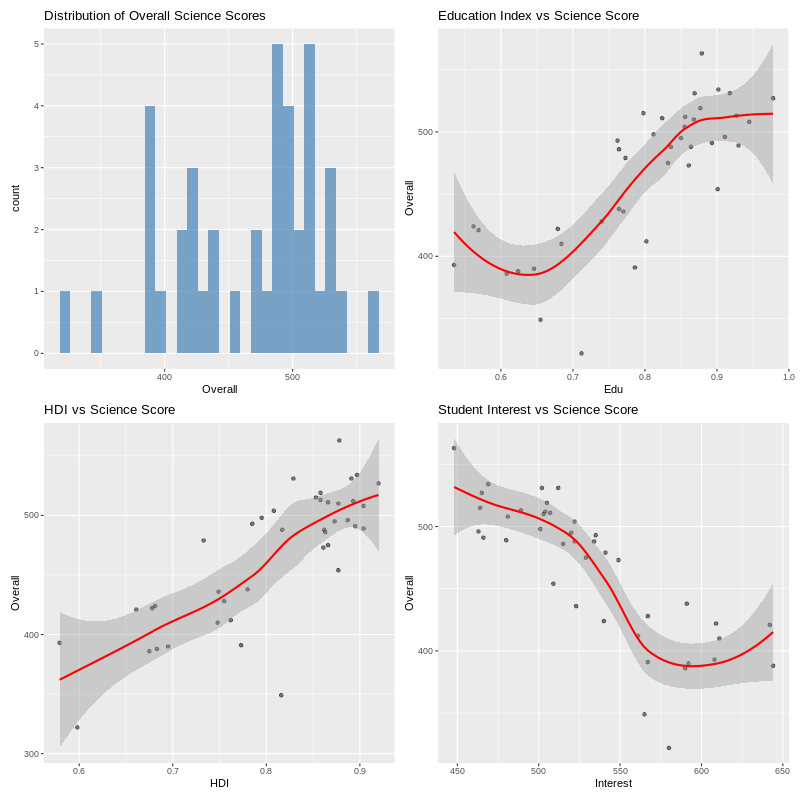

In [13]:
%%R -w 800 -h 800 -u px
# Plot distributions and relationships
p1 <- ggplot(train, aes(Overall)) +
  geom_histogram(bins = 30, fill = "steelblue", alpha = 0.7) +
  labs(title = "Distribution of Overall Science Scores")

p2 <- ggplot(train, aes(Edu, Overall)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Education Index vs Science Score")

p3 <- ggplot(train, aes(HDI, Overall)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "HDI vs Science Score")

p4 <- ggplot(train, aes(Interest, Overall)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Student Interest vs Science Score")

(p1 + p2) / (p3 + p4)

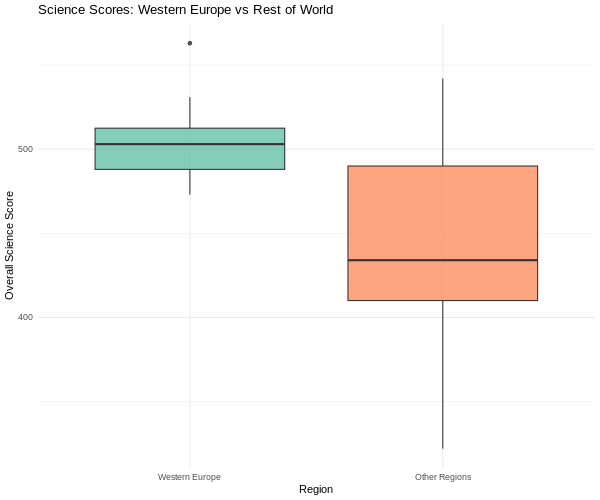

In [15]:
%%R -w 600 -h 500 -u px
# Plot boxplots for each region

ggplot(df, aes(x = region_broad, y = Overall, fill = region_broad)) +
  geom_boxplot(alpha = 0.8) +
  labs(title = "Science Scores: Western Europe vs Rest of World",
       x = "Region", y = "Overall Science Score") +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal() +
  theme(legend.position = "none")

### Fit GAMLSS with Continuous Distributions

GAMLSS models are fitted using `gamlss()` with a specified `family` argument to define the distribution. We explore three types of distributions: **continuous**, **discrete**, and **mixed**, incorporating smooth terms (P-splines via `pb()`) for non-linear effects.

### Normal Distribution with Linear Terms

In [18]:
%%R
fit1 <- gamlss(
  Overall ~ Edu + Health + HDI + Interest + region_broad,
  sigma.formula = ~ 1,
  family = NO(),
  data = train,
  trace = FALSE
)
summary(fit1)

******************************************************************
Family:  c("NO", "Normal") 

Call:  gamlss(formula = Overall ~ Edu + Health + HDI + Interest +  
    region_broad, sigma.formula = ~1, family = NO(),  
    data = train, trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)               568.8190   159.7472   3.561  0.00112 **
Edu                        38.8587   106.4090   0.365  0.71724   
Health                    -17.3220   198.0510  -0.087  0.93082   
HDI                       181.3399   244.5280   0.742  0.46343   
Interest                   -0.4752     0.1830  -2.597  0.01379 * 
region_broadOther Regions -20.6128    11.1335  -1.851  0.07281 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link fun

In [19]:
%%R
coefs <- coef(fit1)
names <- names(coefs)

# Identify shape/scale parameters
is_sigma <- grepl("sigma", names, ignore.case = TRUE)
is_nu     <- grepl("nu",     names, ignore.case = TRUE)
is_tau    <- grepl("tau",    names, ignore.case = TRUE)

# Mean coefficients = NOT sigma, nu, or tau
mu_coef <- coefs[! (is_sigma | is_nu | is_tau)]
sigma_coef <- coefs[is_sigma]
nu_coef    <- coefs[is_nu]
tau_coef   <- coefs[is_tau]

# Print
cat("Mean (μ) Coefficients:\n"); print(mu_coef)
cat("\nScale (σ) Coefficients:\n"); print(sigma_coef)
if(length(nu_coef) > 0) { cat("\nSkewness (ν) Coefficients:\n"); print(nu_coef) }
if(length(tau_coef) > 0) { cat("\nKurtosis (τ) Coefficients:\n"); print(tau_coef) }

Mean (μ) Coefficients:
              (Intercept)                       Edu                    Health 
              568.8189890                38.8587282               -17.3220165 
                      HDI                  Interest region_broadOther Regions 
              181.3399001                -0.4751871               -20.6127933 

Scale (σ) Coefficients:
named numeric(0)


### Normal Distribution with P-Spline Smooths

In [20]:
%%R
fit2 <- gamlss(
  Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  family = NO(),
  data = train,
  trace = FALSE
)
summary(fit2)

******************************************************************
Family:  c("NO", "Normal") 

Call:  gamlss(formula = Overall ~ pb(Edu) + pb(Health) + pb(HDI) +  
    pb(Interest) + region_broad, sigma.formula = ~region_broad,  
    family = NO(), data = train, trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                494.7388    53.8143   9.193 1.11e-09 ***
pb(Edu)                    176.2696    40.1647   4.389 0.000167 ***
pb(Health)                -103.9625    72.6974  -1.430 0.164525    
pb(HDI)                    155.0298   103.4006   1.499 0.145758    
pb(Interest)                -0.3736     0.0535  -6.983 1.98e-07 ***
region_broadOther Regions    1.0114     7.3227   0.138 0.891201    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

----------------------------------------

### Box-Cox Cole and Green (BCCG) — Skewness Allowed

In [21]:
%%R
fit3 <- gamlss(
  Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  nu.formula = ~ region_broad,  # models skewness
  family = BCCG(),
  data = train,
  trace = FALSE
)
summary(fit3)

******************************************************************
Family:  c("BCCG", "Box-Cox-Cole-Green") 

Call:  gamlss(formula = Overall ~ pb(Edu) + pb(Health) + pb(HDI) +  
    pb(Interest) + region_broad, sigma.formula = ~region_broad,  
    nu.formula = ~region_broad, family = BCCG(), data = train,  
    trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               466.97252   41.23655  11.324 4.85e-11 ***
pb(Edu)                   224.16749   46.69842   4.800 7.13e-05 ***
pb(Health)                -51.15098   83.68484  -0.611    0.547    
pb(HDI)                    85.72720  131.52952   0.652    0.521    
pb(Interest)               -0.38130    0.04737  -8.049 3.12e-08 ***
region_broadOther Regions   3.68199   18.57939   0.198    0.845    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

### Box-Cox Power Exponential (BCPE) — Skewness & Kurtosis

In [22]:
%%R
fit4 <- gamlss(
  Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  nu.formula = ~ region_broad,      # skewness
  tau.formula = ~ region_broad,     # kurtosis
  family = BCPE(),
  data = train,
  trace = FALSE
)

summary(fit4)

******************************************************************
Family:  c("BCPE", "Box-Cox Power Exponential") 

Call:  
gamlss(formula = Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) +  
    region_broad, sigma.formula = ~region_broad, nu.formula = ~region_broad,  
    tau.formula = ~region_broad, family = BCPE(), data = train,  
    trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
                            Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                5.258e+02  2.179e-01  2412.54   <2e-16 ***
pb(Edu)                    1.792e+02  1.590e-01  1127.03   <2e-16 ***
pb(Health)                 1.050e+02  2.896e-01   362.49   <2e-16 ***
pb(HDI)                   -3.883e+01  3.972e-01   -97.77   <2e-16 ***
pb(Interest)              -5.092e-01  2.275e-04 -2237.90   <2e-16 ***
region_broadOther Regions -1.121e+01  2.440e-02  -459.33   <2e-16 ***
---
Sig

### Model Diagnostics

Check residuals and worm plots for each model.

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  0.5650169 
                       variance   =  1.596218 
               coef. of skewness  =  1.703207 
               coef. of kurtosis  =  3.955172 
Filliben correlation coefficient  =  0.6871368 
******************************************************************


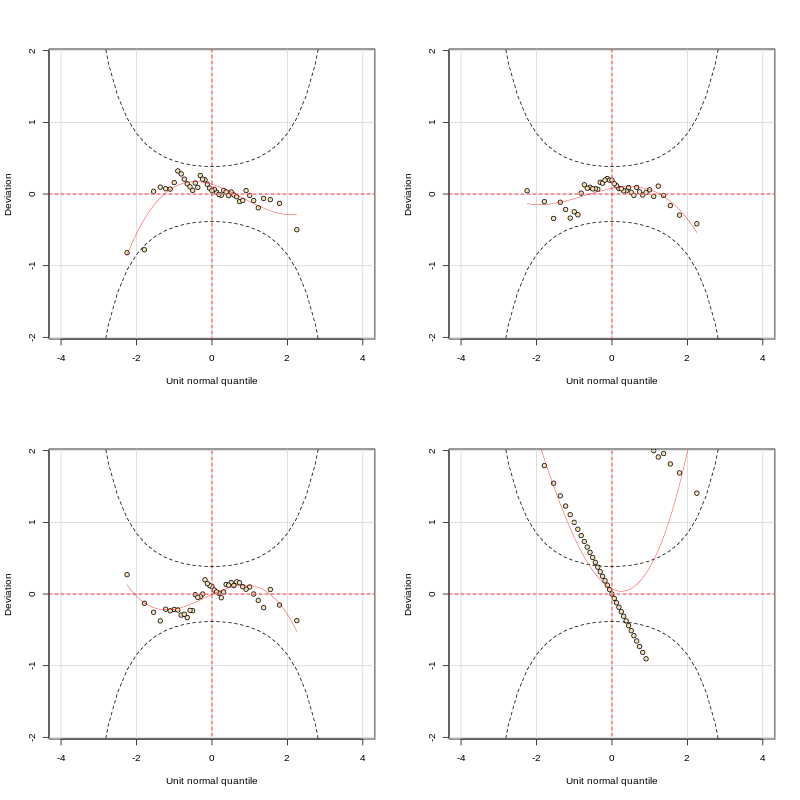

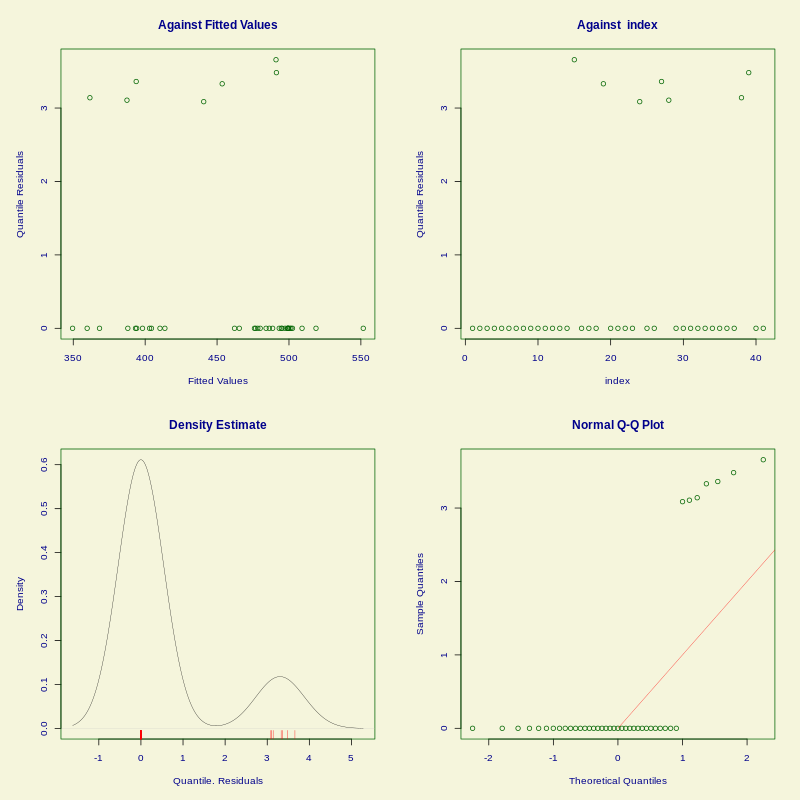

In [23]:
%%R -w 800 -h 800 -u px
# Residuals
# Worm plot (detrended Q-Q plot) — should be within ±2 bands
par(mfrow = c(2, 2))
wp(fit1, main = "Model 1: Normal Linear")
wp(fit2, main = "Model 2: Normal + Smooths")
wp(fit3, main = "Model 3: BCCG")
wp(fit4, main = "Model 4: BCPE")

# Residual vs Fitted
plot(fit4, which = 1)  # for latest model

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -2.629949e-14 
                       variance   =  1.026316 
               coef. of skewness  =  -0.4128001 
               coef. of kurtosis  =  3.077463 
Filliben correlation coefficient  =  0.9841758 
******************************************************************


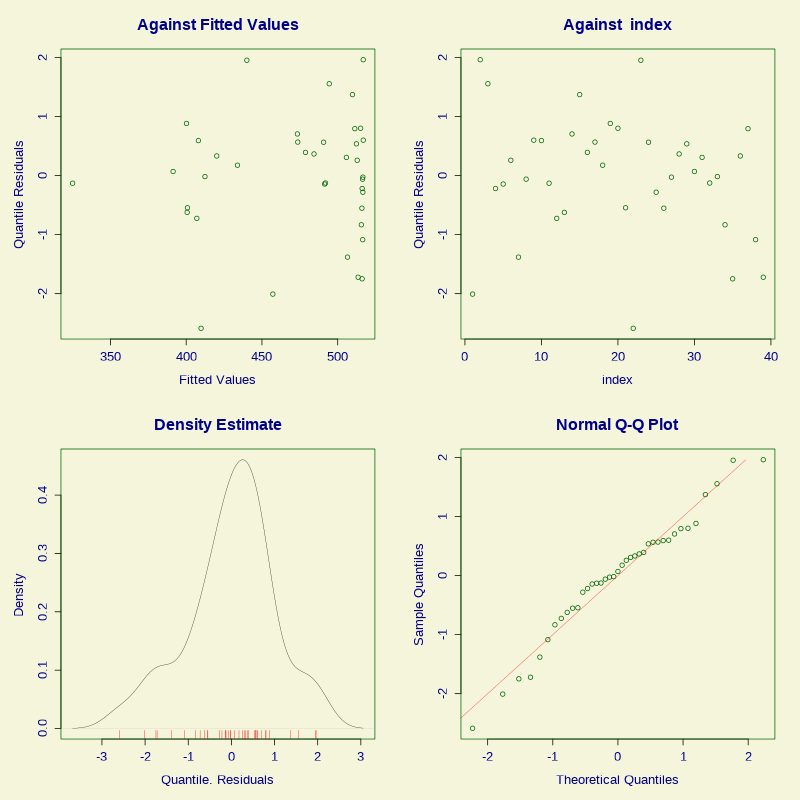

In [ ]:
%%R -w 800 -h 800 -u px
#Plotting the Model
plot(gamlss.uni,se = TRUE)

### Model Comparison Using GAIC and RMSE

Compare models using Generalized Akaike Information Criterion  RAMSE:

In [24]:
%%R
# Compare models using GAIC
models <- list(fit1, fit2, fit3, fit4)
model_names <- c("Normal Linear", "Normal Smooth", "BCCG", "BCPE")
gaic_values <- sapply(models, GAIC)
comparison <- data.frame(Model = model_names, GAIC = gaic_values)
comparison[order(comparison$GAIC), ]

# Calculate RMSE on test set
calculate_rmse <- function(model, test_data) {
  if (family(model)[1] == "BE") {
    # For beta model, use scaled response
    test_scaled <- (test_data$Overall - min(train$Overall)) /
      (max(train$Overall) - min(train$Overall)) * 0.99 + 0.005
    predictions <- predict(model, newdata = test_data, type = "response")
    rmse <- sqrt(mean((test_scaled - predictions)^2))
  } else {
    predictions <- predict(model, newdata = test_data, type = "response")
    rmse <- sqrt(mean((test_data$Overall - predictions)^2))
  }
  return(rmse)
}

# Add RMSE to comparison
comparison$RMSE <- sapply(models, calculate_rmse, test_data = test)
comparison[order(comparison$GAIC), ]

          Model     GAIC     RMSE
3          BCCG 355.5597 40.83410
2 Normal Smooth 356.4723 40.22505
1 Normal Linear 405.8821 33.89379
4          BCPE 425.4795 39.46315


### Diagnostic Plots

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.04402817 
                       variance   =  1.110059 
               coef. of skewness  =  -0.1733123 
               coef. of kurtosis  =  1.95627 
Filliben correlation coefficient  =  0.9866644 
******************************************************************


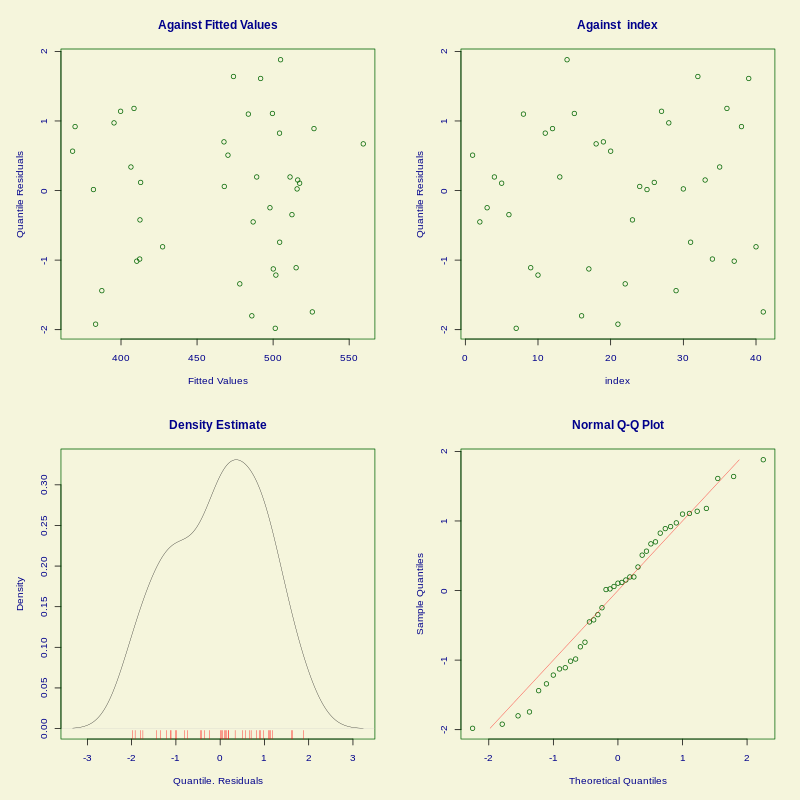

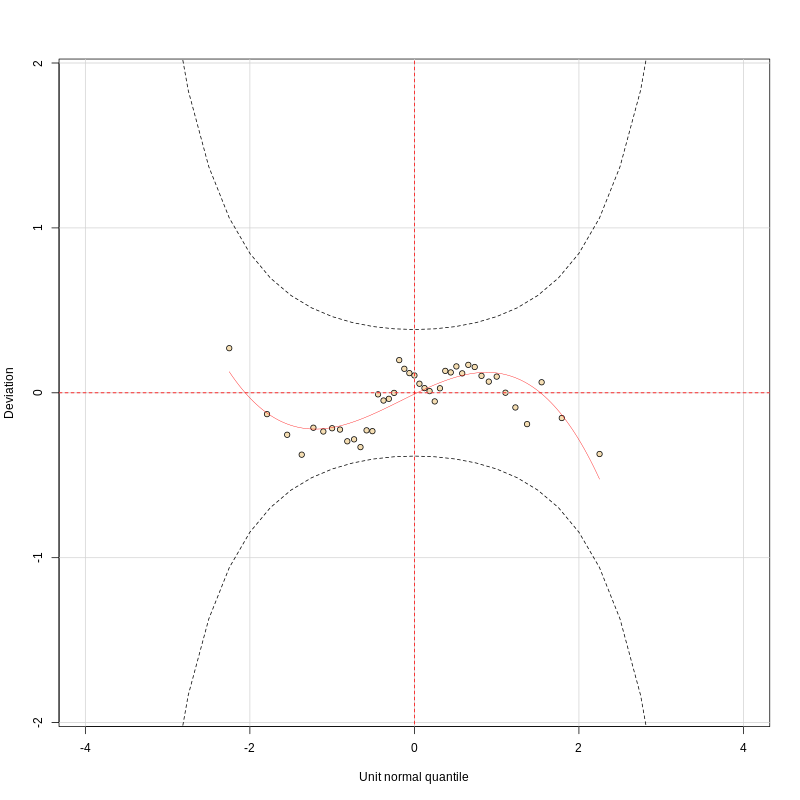

In [25]:
%%R -w 800 -h 800 -u px
# Diagnostic plots for the best model
best_model <- models[[which.min(gaic_values)]]
plot(best_model)
wp(best_model)

### Plot Smooth Effect


******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.04402817 
                       variance   =  1.110059 
               coef. of skewness  =  -0.1733123 
               coef. of kurtosis  =  1.95627 
Filliben correlation coefficient  =  0.9866644 
******************************************************************
NULL


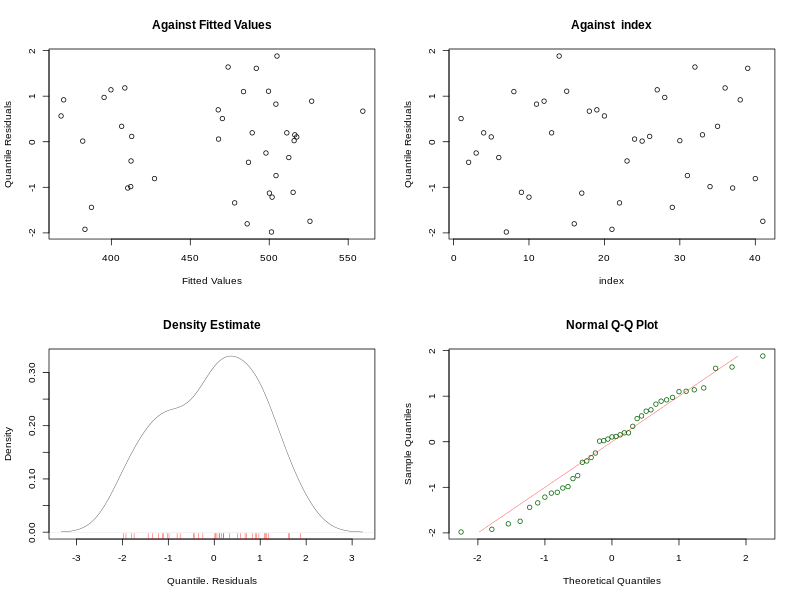

In [26]:
%%R -w 800 -h 600 -u px
# Plot smooth effects
par(mfrow = c(2, 2))
plot(best_model, param = "mu", ylim.all = TRUE)

### Extract fitted smooths for Interest

In [27]:
%%R
# Extract fitted smooths for Interest
pred_grid <- data.frame(
  Edu = mean(train$Edu),
  Health = mean(train$Health),
  HDI = mean(train$HDI),
  Interest = seq(min(train$Interest), max(train$Interest), length.out = 100),
  region_broad = "Western Europe"
)

pred_mu <- predict(best_model, newdata = pred_grid, type = "response", what = "mu")
print(head(pred_mu))

[1] 536.8947 526.4687 516.2222 506.3349 496.9864 488.3562


### Plot Predicted Scores

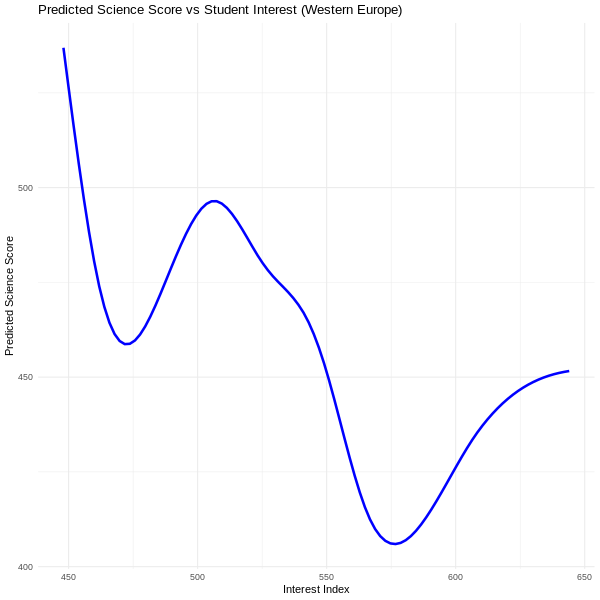

In [28]:
%%R -w 600 -h 600 -u px
ggplot(pred_grid, aes(Interest, pred_mu)) +
  geom_line(color = "blue", size = 1.2) +
  labs(title = "Predicted Science Score vs Student Interest (Western Europe)",
       x = "Interest Index", y = "Predicted Science Score") +
  theme_minimal()

## Model Selection Using Validation/Test Data Sets and Cross-Validation in GAMLSS

GAMLSS provides several powerful functions for model selection using validation data and cross-validation. These methods help prevent overfitting and select models that generalize well to new data.

We will use `pb()` is the shorthand for fitting smoothing function.

### Using `gamlssVGD()` for Validation Set Approach

The function `gamlssVGD()` fits a gamlss model to the training data set determined by the arguments newdata. The results is a gamlssVGD objects which contains the gamlss fit to the training data plus three extra components: i) VGD the global deviance applied to the validation data sets. ii) predictError which is VGD divided with the number of observations in the validation data set and iii) residVal the residuals for the validation data set.

The function `VGD()` extract the validated global deviance from one or more fitted gamlssVGD objects and can be used foe model comparison.

In [29]:
%%R
# Normal Distribution with Linear Terms
vgd_1<- gamlssVGD(
  Overall ~ Edu + Health + HDI + Interest + region_broad,
  sigma.formula = ~ 1,
  family = NO(),
  data = train,
  newdata= test,
  trace = FALSE
)

# Normal Distribution with P-Spline Smooths
vgd_2<-gamlssVGD(
  Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  family = NO(),
  data = train,
  newdata= test,
  trace = FALSE
)

# Box-Cox Cole and Green (BCCG) — Skewness Allowed
vgd_3 <- gamlssVGD(Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  nu.formula = ~ region_broad,  # models skewness
  family = BCCG(),
  data = train,
  newdata= test,
  trace = FALSE)

#  Box-Cox Power Exponential (BCPE) — Skewness & Kurtosis
vgd_4 <- gamlssVGD(Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  nu.formula = ~ region_broad,      # skewness
  tau.formula = ~ region_broad,     # kurtosis
  family = BCPE(),
  data = train,
  newdata= test,
  trace = FALSE
)

# Compare models using VGD
vgd_comparison <- VGD(vgd_1, vgd_2, vgd_3, vgd_4)
print("Validation Global Deviance Comparison:")
print(vgd_comparison)

# Extract validation residuals
resid_model1 <- resid(vgd_1)
resid_model2 <- resid(vgd_2)
resid_model3 <- resid(vgd_3)
resid_model4 <- resid(vgd_4)

# Calculate validation RMSE
vgd_rmse <- data.frame(
  Model = c("Normal Linear", "Normal Smooth", "BCCG", "BCPE"),
  RMSE = c(sqrt(mean(resid_model1^2)),
           sqrt(mean(resid_model2^2)),
           sqrt(mean(resid_model3^2)),
           sqrt(mean(resid_model4^2)))
)
print("Validation RMSE:")
print(vgd_rmse[order(vgd_rmse$RMSE), ])

[1] "Validation Global Deviance Comparison:"
           Pred.GD
vgd_1 1.093823e+02
vgd_2 5.524244e+02
vgd_3 7.941127e+16
vgd_4          Inf
[1] "Validation RMSE:"
          Model     RMSE
2 Normal Smooth 1.000000
1 Normal Linear 1.000000
3          BCCG 1.041596
4          BCPE 1.369865


******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -2.120698e-12 
                       variance   =  1.026316 
               coef. of skewness  =  0.2784542 
               coef. of kurtosis  =  3.311798 
Filliben correlation coefficient  =  0.986157 
******************************************************************


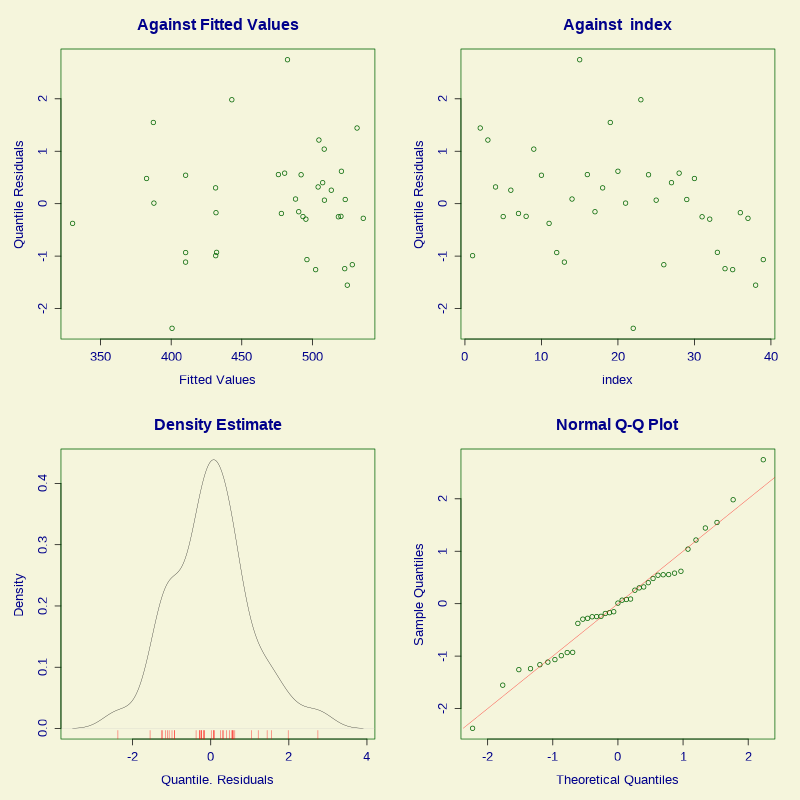

In [ ]:
%%R -w 800 -h 800 -u px
#Plotting the Model
plot(gamlss.multi,se = TRUE)

### Using `getTGD()` for Pre-fitted Model

The function `getTGD()` operates different from the function gamlssVGD(). It assumes that the users already have fitted models using gamlss() and now he/she wants to evaluate the global deviance at a new (validation or test) data set.

The function `TGD()` extract the validated/test global deviance from one or more fitted gamlssTGD objects and can be use to compare models.

In [30]:
%%R
# Evaluate on validation set using getTGD()
model1_tgd <- getTGD(fit1, newdata =  test)
model2_tgd <- getTGD(fit2, newdata = test)
model3_tgd <- getTGD(fit3, newdata = test)
model4_tgd <- getTGD(fit4, newdata = test)

# Compare using TGD
tgd_comparison <- TGD(model1_tgd, model2_tgd, model3_tgd,  model4_tgd )
print("Test Global Deviance Comparison:")
print(tgd_comparison)

[1] "Test Global Deviance Comparison:"
                Pred.GD
model1_tgd 1.093823e+02
model2_tgd 5.524244e+02
model3_tgd 7.941127e+16
model4_tgd          Inf


### Using `gamlssCV()` for k-Fold Cross-Validation

The `gamlssCV()` performs a k-fold cross validation on a gamlss models.

The function `CV()` extract the cross validated global deviance from one or more fitted gamlssCV objects and can be use to compare models.

In [31]:
%%R
# Prepare data correctly
df <- mf %>%
  dplyr::select(Country, Overall, Edu, Health, HDI, Interest) %>%
  dplyr::mutate(
    region_broad = ifelse(Country %in% western_europe,
                          "Western Europe",
                          "Other Regions"),
    region_broad = factor(region_broad, levels = c("Western Europe", "Other Regions"))
  ) %>%
  dplyr::filter(if_all(c(Overall, Edu, Health, HDI, Interest), is.finite)) %>%
  as.data.frame()  # Convert to data.frame for better compatibility

# Ensure all variables are numeric where expected
df$Edu <- as.numeric(df$Edu)
df$Health <- as.numeric(df$Health)
df$HDI <- as.numeric(df$HDI)
df$Interest <- as.numeric(df$Interest)
df$Overall <- as.numeric(df$Overall)

# Perform 5-fold cross-validation
set.seed(123)
# Normal Distribution with Linear Terms
CV_1<- gamlssCV(
  Overall ~ Edu + Health + HDI + Interest + region_broad,
  sigma.formula = ~ 1,
  family = NO(),
  data = df,
  k= 5
)

# Normal Distribution with P-Spline Smooths
CV_2<-gamlssCV(
  Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  family = NO(),
  data = df,
  k=5,
  trace = FALSE
)

# Box-Cox Cole and Green (BCCG) — Skewness Allowed
CV_3 <- gamlssCV(Overall ~ pb(Edu) + pb(Health) + pb(HDI) + pb(Interest) + region_broad,
  sigma.formula = ~ region_broad,
  nu.formula = ~ region_broad,  # models skewness
  family = BCCG(),
  data = df,
  k=5,
  trace = FALSE)

# Extract CV results
cv_results <- data.frame(
  Model = c("Normal Linear", "Normal Smooth", "BCCG"),
  CV_Deviance = c(CV(CV_1), CV(CV_2), CV(CV_3))
)
print("Cross-Validation Results:")
print(cv_results[order(cv_results$CV_Deviance), ])

fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
[1] "Cross-Validation Results:"
          Model CV_Deviance
1 Normal Linear    542.5554
2 Normal Smooth    704.7977
3          BCCG   4256.9440


##  Model Selection

The functions `add1TGD()`, `drop1TGD()` and `stepTGD` behave similar to `add1()`, `drop1()` and `stepGAIC()` functions respectively but they used validation or test deviance as the selection criterion rather than the GAIC.

In [32]:
%%R
# Using validation data for model selection
# Create a proper base model
base_model <- gamlss(Overall ~ region_broad,
                    family = NO,
                    data = train,
                    control = gamlss.control(n.cyc = 50, trace = FALSE))

### Stepwise Selection with Proper Scope Definition

In [33]:
%%R
# Define scope properly - all terms must be present in the upper formula
tryCatch({
  stepwise_model <- stepTGD(base_model,
                           scope = list(
                             lower = ~ region_broad,  # Minimal model
                             upper = ~ region_broad + Edu + Health + HDI + Interest
                           ),
                           newdata = test,
                           direction = "both",
                           trace = TRUE)

  print("Stepwise TGD selection results:")
  print(stepwise_model)

}, error = function(e) {
  cat("Error in stepTGD:", e$message, "\n")
  cat("Trying alternative approach...\n")
})

Distribution parameter:  mu 
Start:  TGD= 117.66 
 Overall ~ region_broad 

           Df    TGD
+ HDI       1 107.67
+ Edu       1 111.58
+ Interest  1 112.66
+ Health    1 114.98
<none>        117.66

Step:  TGD= 107.67 
 Overall ~ region_broad + HDI 

           Df    TGD
+ Health    1 107.65
<none>        107.67
+ Edu       1 108.14
+ Interest  1 109.27
- HDI       1 117.66

Step:  TGD= 107.65 
 Overall ~ region_broad + HDI + Health 

           Df    TGD
<none>        107.65
- Health    1 107.67
+ Edu       1 108.18
+ Interest  1 109.08
- HDI       1 114.98
[1] "Stepwise TGD selection results:"

Family:  c("NO", "Normal") 
Fitting method: RS() 

Call:  gamlss(formula = Overall ~ region_broad + HDI + Health,  
    family = NO, data = train, control = gamlss.control(n.cyc = 50,  
        trace = FALSE), trace = FALSE) 

Mu Coefficients:
              (Intercept)  region_broadOther Regions  
                   237.47                     -21.27  
                      HDI             

### Using add1TGD() and drop1TGD()

In [34]:
%%R
# Fit a full model first
full_model <- gamlss(Overall ~ region_broad + Edu + Health + HDI + Interest,
                    family = NO, data = train)

# Use add1TGD and drop1TGD properly
tryCatch({
  # add1TGD from base model
  add1_results <- add1TGD(base_model,
                         scope = ~ . + Edu + Health + HDI + Interest,
                         newdata = test)
  print("add1TGD results:")
  print(add1_results)

  # drop1TGD from full model
  drop1_results <- drop1TGD(full_model, newdata = test)
  print("drop1TGD results:")
  print(drop1_results)

}, error = function(e) {
  cat("Error in add1TGD/drop1TGD:", e$message, "\n")
})

GAMLSS-RS iteration 1: Global Deviance = 391.8821 
GAMLSS-RS iteration 2: Global Deviance = 391.8821 
[1] "add1TGD results:"
Single term additions for
mu

Model:
Overall ~ region_broad
         Df    TGD
<none>      117.66
Edu       1 111.58
Health    1 114.98
HDI       1 107.67
Interest  1 112.66
[1] "drop1TGD results:"
Single term deletions for
mu

Model:
Overall ~ region_broad + Edu + Health + HDI + Interest
             Df    TGD
<none>          109.38
region_broad  1 107.03
Edu           1 109.08
Health        1 109.45
HDI           1 110.46
Interest      1 108.18


### Manual Stepwise Selection using add1TGD() and drop1TGD()

In [35]:
%%R
# Manual stepwise selection
current_model <- base_model
current_tgd <- getTGD(current_model, newdata = test)
current_tgd_value <- TGD(current_tgd)

cat("Starting TGD:", current_tgd_value, "\n")

# Stepwise forward selection
max_steps <- 10
step_history <- data.frame()

for(step in 1:max_steps) {
  cat("\n=== Step", step, "===\n")

  # Check what variables can be added
  available_vars <- c("Edu", "Health", "HDI", "Interest")
  current_vars <- all.vars(formula(current_model))
  vars_to_add <- setdiff(available_vars, current_vars)

  if(length(vars_to_add) > 0) {
    # Try adding each variable
    add_results <- list()
    for(var in vars_to_add) {
      tryCatch({
        new_formula <- update(formula(current_model), as.formula(paste0("~ . + ", var)))
        new_model <- gamlss(new_formula, family = NO, data = train)
        new_tgd <- getTGD(new_model, newdata = test)
        add_results[[var]] <- TGD(new_tgd)
      }, error = function(e) {
        add_results[[var]] <- Inf
      })
    }

    # Find best variable to add
    best_add_var <- names(which.min(unlist(add_results)))
    best_add_tgd <- min(unlist(add_results))

    cat("Best variable to add:", best_add_var, "with TGD:", best_add_tgd, "\n")

    if(best_add_tgd < current_tgd_value) {
      # Add the variable
      new_formula <- update(formula(current_model), as.formula(paste0("~ . + ", best_add_var)))
      current_model <- gamlss(new_formula, family = NO, data = train)
      current_tgd_value <- best_add_tgd
      cat("Added", best_add_var, "- New TGD:", current_tgd_value, "\n")

      step_history <- rbind(step_history, data.frame(
        Step = step,
        Action = "Add",
        Variable = best_add_var,
        TGD = current_tgd_value,
        Formula = deparse(formula(current_model))
      ))
    } else {
      cat("No improvement by adding variables. Stopping.\n")
      break
    }
  }

  # Check if we can drop any variables (skip intercept and region_broad)
  current_vars <- all.vars(formula(current_model))
  vars_to_drop <- setdiff(current_vars, c("Overall", "region_broad", "(Intercept)"))

  if(length(vars_to_drop) > 0) {
    drop_results <- list()
    for(var in vars_to_drop) {
      tryCatch({
        new_formula <- update(formula(current_model), as.formula(paste0("~ . - ", var)))
        new_model <- gamlss(new_formula, family = NO, data = train)
        new_tgd <- getTGD(new_model, newdata = test)
        drop_results[[var]] <- TGD(new_tgd)
      }, error = function(e) {
        drop_results[[var]] <- Inf
      })
    }

    # Find best variable to drop
    best_drop_var <- names(which.min(unlist(drop_results)))
    best_drop_tgd <- min(unlist(drop_results))

    cat("Best variable to drop:", best_drop_var, "with TGD:", best_drop_tgd, "\n")

    if(best_drop_tgd < current_tgd_value) {
      # Drop the variable
      new_formula <- update(formula(current_model), as.formula(paste0("~ . - ", best_drop_var)))
      current_model <- gamlss(new_formula, family = NO, data = train)
      current_tgd_value <- best_drop_tgd
      cat("Dropped", best_drop_var, "- New TGD:", current_tgd_value, "\n")

      step_history <- rbind(step_history, data.frame(
        Step = step,
        Action = "Drop",
        Variable = best_drop_var,
        TGD = current_tgd_value,
        Formula = deparse(formula(current_model))
      ))
    }
  }
}

cat("\n=== FINAL MODEL ===\n")
print(summary(current_model))
cat("Final TGD:", current_tgd_value, "\n")
cat("Final formula:", deparse(formula(current_model)), "\n")

print("Step history:")
print(step_history)

Starting TGD: 117.6563 

=== Step 1 ===
GAMLSS-RS iteration 1: Global Deviance = 404.0472 
GAMLSS-RS iteration 2: Global Deviance = 404.0472 
GAMLSS-RS iteration 1: Global Deviance = 416.6689 
GAMLSS-RS iteration 2: Global Deviance = 416.6689 
GAMLSS-RS iteration 1: Global Deviance = 401.3281 
GAMLSS-RS iteration 2: Global Deviance = 401.3281 
GAMLSS-RS iteration 1: Global Deviance = 396.2902 
GAMLSS-RS iteration 2: Global Deviance = 396.2902 
Best variable to add: HDI with TGD: 107.6711 
GAMLSS-RS iteration 1: Global Deviance = 401.3281 
GAMLSS-RS iteration 2: Global Deviance = 401.3281 
Added HDI - New TGD: 107.6711 
GAMLSS-RS iteration 1: Global Deviance = 428.1335 
GAMLSS-RS iteration 2: Global Deviance = 428.1335 
Best variable to drop: HDI with TGD: 117.6563 

=== Step 2 ===
GAMLSS-RS iteration 1: Global Deviance = 399.0269 
GAMLSS-RS iteration 2: Global Deviance = 399.0269 
GAMLSS-RS iteration 1: Global Deviance = 398.5736 
GAMLSS-RS iteration 2: Global Deviance = 398.5736 
GAML

In [ ]:
%%R
# Fit a Negative Binomial regression model using the gam() function
pois.gam.nb = gam(leaves ~ year + s(degdays), data=count.data, family=nb())
summary(pois.gam.nb)


Family: Negative Binomial(12809990.186) 
Link function: log 

Formula:
leaves ~ year + s(degdays)

Parametric coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -407.46534  106.35067  -3.831 0.000127 ***
year           0.21059    0.05436   3.874 0.000107 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df Chi.sq p-value    
s(degdays) 1.509  1.856  155.8  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.967   Deviance explained = 97.3%
-REML = 54.995  Scale est. = 1         n = 14


###  Different Distribution Families with Validation

In [36]:
%%R
# Compare different distribution families
models_dist <- list()

# Normal distribution
models_dist$NO <- gamlssVGD(Overall ~ pb(Edu) + pb(Health) + HDI + Interest + region_broad,
                           family = NO, data = train, newdata =test)

# t-distribution (more robust)
models_dist$TF <- gamlssVGD(Overall ~ pb(Edu) + pb(Health) + HDI + Interest + region_broad,
                           family = TF, data = train, newdata = test)

# Box-Cox t distribution
models_dist$BCT <- gamlssVGD(Overall ~ pb(Edu) + pb(Health) + HDI + Interest + region_broad,
                            family = BCT, data = train, newdata = test)

# Compare distributions
dist_comparison <- VGD(models_dist$NO, models_dist$TF, models_dist$BCT)
print("Distribution Family Comparison:")
print(dist_comparison)

[1] "Distribution Family Comparison:"
                 Pred.GD
models_dist$TF  108.0406
models_dist$NO  109.3823
models_dist$BCT 110.7876


## Fit GAMLSS Model by Region

Now we fit separate GAMLSS models for Western Europe and Other Regions to account for regional differences.

### Data and Data Processing

In [37]:
%%R
url <- "https://raw.githubusercontent.com/m-clark/generalized-additive-models/master/data/pisasci2006.csv"
western_europe <- c("Austria", "Belgium", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Luxembourg", "Netherlands", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland")

df_clean <- read_csv(url) %>%
  dplyr::select(Country, Overall, Edu, Health, HDI, Interest) %>%
  mutate(
    region_broad = if_else(Country %in% western_europe, "Western Europe", "Other Regions") %>%
      factor(levels = c("Western Europe", "Other Regions"))
  ) %>%
  filter(if_all(c(Overall, Edu, Health, HDI, Interest), is.finite))

detach("package:plyr", unload = TRUE)

cat("=== MISSINGNESS ANALYSIS ===\n")
df_clean %>%
  group_by(region_broad) %>%
  summarise(
    n = nrow(cur_data()),
    miss_Overall = sum(is.na(Overall)),
    miss_HDI = sum(is.na(HDI)),
    miss_Interest = sum(is.na(Interest)),
    complete = sum(complete.cases(cbind(Overall, HDI, Interest)))
  ) %>%
  print()

# Split data
set.seed(101)
tr_prop <- 0.8

train_test_split <- df_clean %>%
  group_by(region_broad) %>%
  group_split() %>%
  map(~ {
    n <- nrow(.x)
    n_train <- max(1, floor(n * tr_prop))
    ids_train <- sample(1:n, size = n_train)
    list(train = .x[ids_train, ], test = .x[-ids_train, ])
  }) %>%
  set_names(c("Western Europe", "Other Regions"))

train <- bind_rows(map2(train_test_split, names(train_test_split), ~ mutate(.x$train, region_broad = .y)))
test <- bind_rows(map2(train_test_split, names(train_test_split), ~ mutate(.x$test, region_broad = .y)))

Rows: 65 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country
dbl (10): Overall, Issues, Explain, Evidence, Interest, Support, Income, Hea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
=== MISSINGNESS ANALYSIS ===
# A tibble: 2 × 6
  region_broad       n miss_Overall miss_HDI miss_Interest complete
  <fct>          <int>        <int>    <int>         <int>    <int>
1 Western Europe    23            0        0             0       23
2 Other Regions     29            0        0             0       29


### Fit Models

In [38]:
%%R
# Initialize storage list
models_broad <- list()
# Define regions before the loop
regions <- na.omit(unique(train$region_broad))

for (region in regions) {
  cat("\n>>> FITTING:", region, "\n")

  # build data.frame from raw vectors
  region_train <- train %>% filter(region_broad == region)
  region_data <- data.frame(
  Overall = region_train$Overall,
  HDI = region_train$HDI,
  Interest = region_train$Interest,
  row.names = NULL
)
region_data <- region_data[complete.cases(region_data), ]
rownames(region_data) <- NULL
attr(region_data, "names") <- names(region_data)
  model <- tryCatch({
    gamlss(
      Overall ~ HDI,
      sigma.formula = ~ Interest,
      family = NO,
      data = region_data,
      control = gamlss.control(c.crit = 0.001, max.iter = 100),
      trace = FALSE
    )
  }, error = function(e) {
    cat("  ERROR:", e$message, "\n")
    return(NULL)
  })

  if (is.null(model) || is.null(coef(model)) || any(is.na(coef(model)))) {
    cat("  Invalid model\n")
    next
  }

  models_broad[[region]] <- model
  cat("  Coefficients:", paste(round(coef(model), 4), collapse = ", "), "\n")
}


>>> FITTING: Western Europe 
GAMLSS-RS iteration 1: Global Deviance = 158.4284 
GAMLSS-RS iteration 2: Global Deviance = 157.7064 
GAMLSS-RS iteration 3: Global Deviance = 157.5981 
GAMLSS-RS iteration 4: Global Deviance = 157.5876 
GAMLSS-RS iteration 5: Global Deviance = 157.5808 
GAMLSS-RS iteration 6: Global Deviance = 157.5806 
  Coefficients: 495.0454, 3.5434 

>>> FITTING: Other Regions 
GAMLSS-RS iteration 1: Global Deviance = 231.9238 
GAMLSS-RS iteration 2: Global Deviance = 231.8496 
GAMLSS-RS iteration 3: Global Deviance = 231.8443 
GAMLSS-RS iteration 4: Global Deviance = 231.8438 
  Coefficients: 58.2424, 507.4908 


### Model Summary

In [39]:
%%R
walk(models_broad, ~ print(summary(.x)))

******************************************************************
Family:  c("NO", "Normal") 

Call:  gamlss(formula = Overall ~ HDI, sigma.formula = ~Interest,  
    family = NO, data = region_data, control = gamlss.control(c.crit = 0.001,  
        max.iter = 100), trace = FALSE) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  495.045    137.302   3.606  0.00287 **
HDI            3.543    161.219   0.022  0.98277   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7.271987   2.380949   3.054  0.00858 **
Interest    -0.008570   0.003996  -2.144  0.05003 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

---------------

### Model Evaluation

In [41]:
%%R
# Manual prediction function (bypasses gamlss::predict bug)
manual_predict_gamlss <- function(model, newdata) {
  beta_mu <- coef(model)[1:2]  # intercept, HDI
  X <- model.matrix(~ HDI, data = newdata)
  eta_mu <- X %*% beta_mu
  as.numeric(eta_mu)  # identity link for NO family
}

# Define calculate_metrics
calculate_metrics <- function(actual, predicted) {
  keep <- !is.na(actual) & !is.na(predicted)
  actual <- actual[keep]
  predicted <- predicted[keep]

  if (length(actual) == 0) {
    return(tibble(RMSE = NA_real_, MAE = NA_real_, R2 = NA_real_))
  }

  residuals <- actual - predicted
  rmse <- sqrt(mean(residuals^2))
  mae <- mean(abs(residuals))
  ss_res <- sum(residuals^2)
  ss_tot <- sum((actual - mean(actual))^2)
  r2 <- 1 - (ss_res / ss_tot)

  return(tibble(RMSE = rmse, MAE = mae, R2 = r2))
}

# Initialize containers
test_results <- tibble()
all_predictions <- tibble()

# Loop over successfully fitted models
for (region in names(models_broad)) {
  # ... rest of your evaluation code ...
}

### Model Diagnostics

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  0.1361549 
                       variance   =  1.039195 
               coef. of skewness  =  -0.09890391 
               coef. of kurtosis  =  2.48446 
Filliben correlation coefficient  =  0.9899621 
******************************************************************
******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -0.02123639 
                       variance   =  1.044971 
               coef. of skewness  =  -1.196319 
               coef. of kurtosis  =  4.483644 
Filliben correlation coefficient  =  0.9366828 
******************************************************************


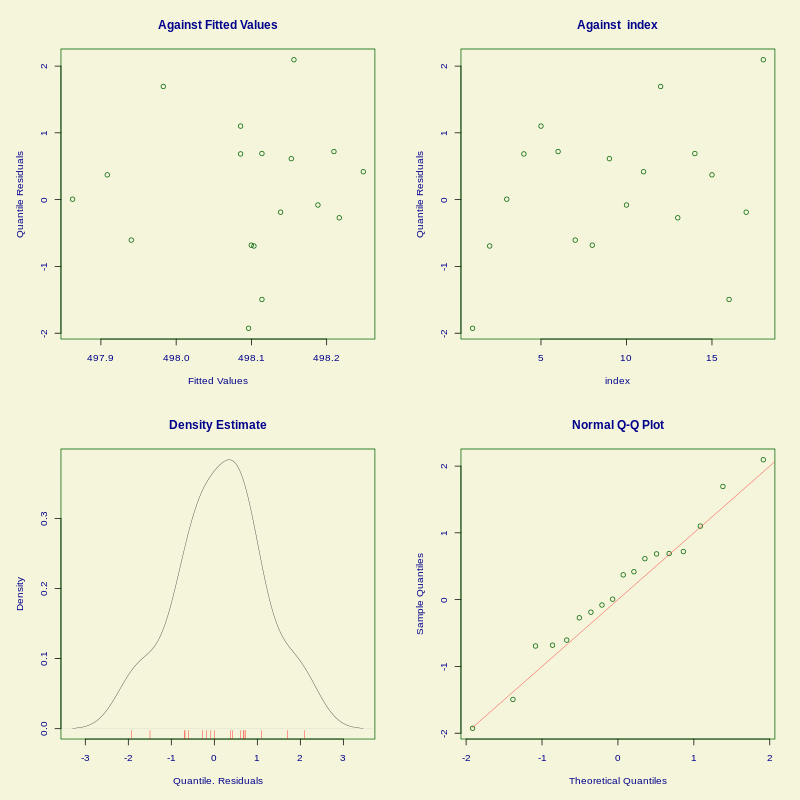

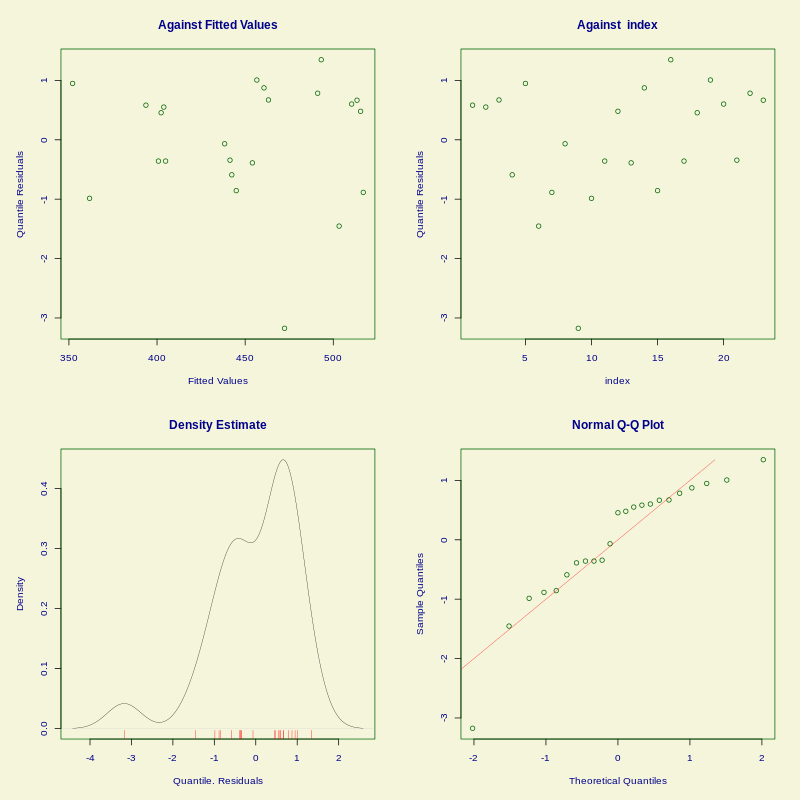

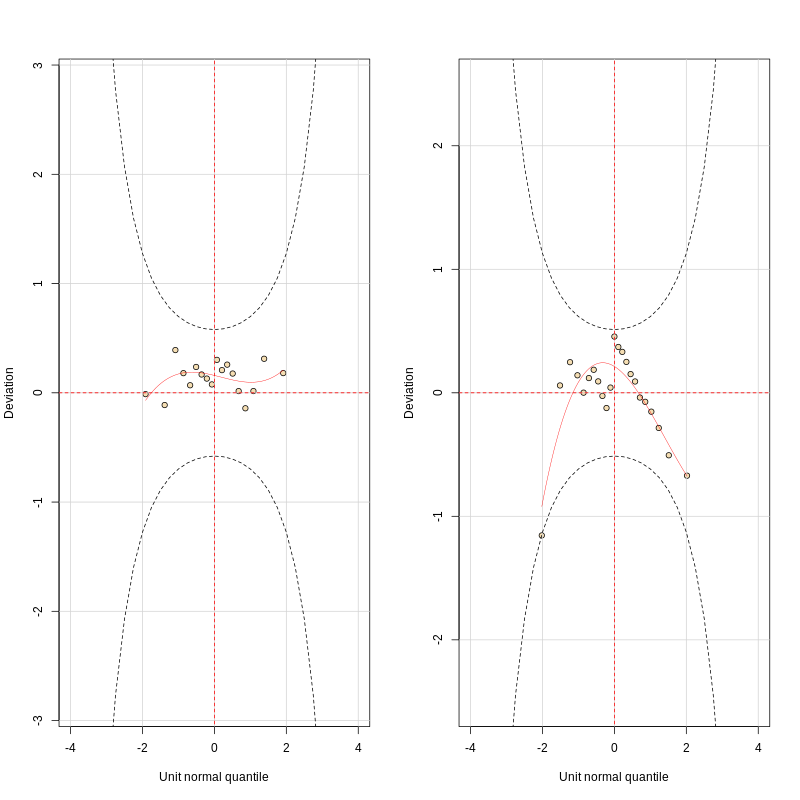

In [43]:
%%R -w 800 -h 800 -u px
# --- Diagnostics ---
if (length(models_broad) > 0) {
  par(mfrow = c(2,2)); walk(models_broad, ~ tryCatch(plot(.x), error = function(e) NULL)); par(mfrow=c(1,1))
  par(mfrow = c(1, min(3, length(models_broad)))); walk(models_broad, ~ tryCatch(wp(.x), error = function(e) NULL)); par(mfrow=c(1,1))
}

## Summary and Conclusions

GAMLESS  (Generalized Additive Models for Location, Scale and Shape) is a powerful extension of Generalized Additive Models (GAMs) that allows for flexible modeling of not just the mean of a response variable, but also its variance, skewness, and kurtosis. This notebook demonstrates how to use GAMLSS in R to model the PISA 2006 science scores using various distributions and techniques. At the end, we also explored model selection techniques using validation data and cross-validation.

## Resources

1.  [GAMLSS: Exploring its applications beyond traditional regression modelin](https://tiagoms.com/posts/gamlss/)

2.  [A flexible regression approach using GAMLSS in R](https://www.gamlss.com/wp-content/uploads/2023/06/book-2010-Athens1-1.pdf)

3. [GAMLSS Practicals for the Bilbao short course October 2019](https://www.gamlss.com/wp-content/uploads/2023/06/Practicals-Bilbao.pdf)
